一、数据处理

In [35]:
!pip install seaborn
!pip install mindspore

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple/

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.2/947.2 MB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
from sklearn.preprocessing import LabelEncoder
#首先我们介绍一下目前导入的包，pandas用于读取car_price.csv，matplotlib用于绘图，sklearn用于数据预处理

In [37]:
car_price=pd.read_csv('car_price.csv')
car_price.head()
car_price.duplicated().sum()
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [38]:
# 提取类别变量的列名
cate_columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']

#打印类别变量每个分类的取值情况
for i in cate_columns:
    print(i)
    print(set(car_price[i]))

symboling
{0, 1, 2, 3, -2, -1}
fueltype
{'diesel', 'gas'}
aspiration
{'turbo', 'std'}
doornumber
{'two', 'four'}
carbody
{'convertible', 'hatchback', 'wagon', 'hardtop', 'sedan'}
drivewheel
{'4wd', 'fwd', 'rwd'}
enginelocation
{'front', 'rear'}
enginetype
{'l', 'rotor', 'dohc', 'dohcv', 'ohcf', 'ohc', 'ohcv'}
fuelsystem
{'spdi', 'idi', '2bbl', '1bbl', 'mfi', 'mpfi', 'spfi', '4bbl'}
cylindernumber
{'twelve', 'six', 'three', 'five', 'two', 'eight', 'four'}


In [39]:
#气缸数可使用具体的数值替换分类
car_price['cylindernumber']=car_price.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [40]:
#提取变量特征数据(除了'car_ID'和'CarName')
car_df=car_price.drop(['car_ID','CarName'],axis=1)

#查看连续数值型情况，并是检查否有异常值
#对数据进行描述性统计
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


由上面可检查类别型特征数据是否有拼写错误，还可知道特征的具体分类情况；

分类取值具有大小意义的，如：

①保险风险评级Symboling的取值范围为：0、 1、2、3、-2、-1，虽是分类特征但其取值是有大小意义的；

②气缸数cylindernumber取值：{‘three’, ‘six’, ‘eight’, ‘five’, ‘four’, ‘twelve’, ‘two’}，这7个取值也是有大小意义的，在同等缸径下，缸数越多，排量越大，功率越高；在同等排量下，缸数越多，缸径越小，转速可以提高，从而获得较大的提升功率；

其他分类取值没有大小意义的，如：

车门数doornumber分’two’、 'four’两类，因车门数是跟车外形设计有关，如公务用途的轿车为四门，而运动用途跑车为两门，完全是不同类型的车型，其取值没有大小意义，只是分类；

fueltype 燃料类型分’gas’和’diesel’两类，等等只是类别上属性的分类。

可看到有很多命名是不规则的，需要修正。如：‘toyouta’, ‘maxda’, ‘porcshce’,‘Nissan’, ‘vw’,‘vokswagen’.

In [41]:
#气缸数可使用具体的数值替换分类
car_price['cylindernumber']=car_price.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [42]:
#提取变量特征数据(除了'car_ID'和'CarName')
car_df=car_price.drop(['car_ID','CarName'],axis=1)

#查看连续数值型情况，并是检查否有异常值
#对数据进行描述性统计
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


从上面数据看，数据集不存在违背常理的异常值

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


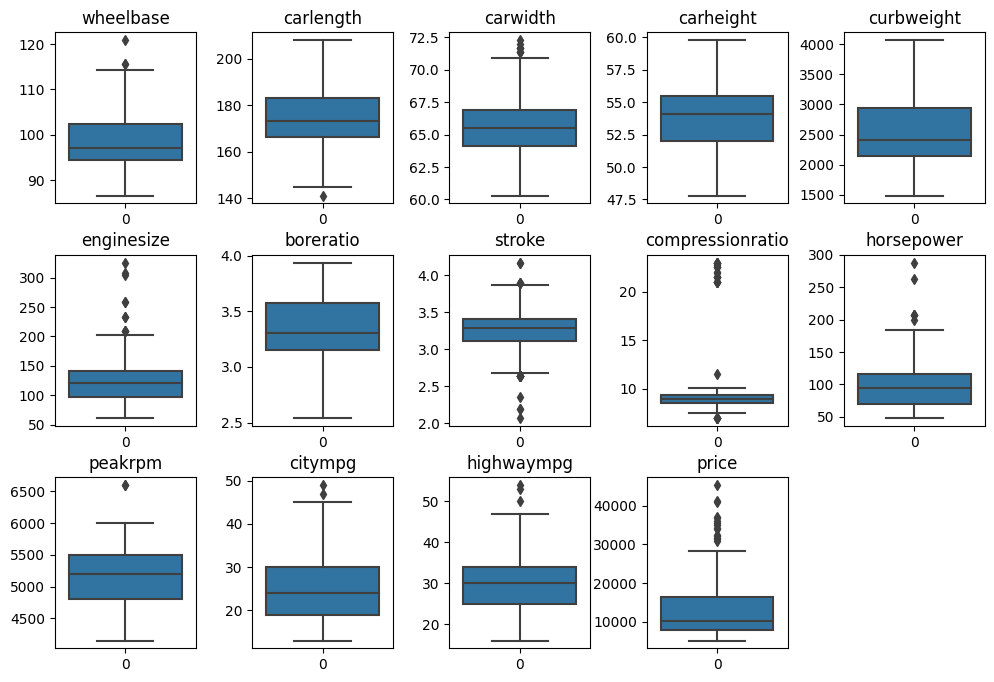

In [43]:
#还可以描绘数据集的箱线图，查看异常值

#提取连续数值型数据的列名
num_cols=car_df.columns.drop(cate_columns)
print(num_cols)

#绘制连续数值型数据的箱线图，检查异常值
import seaborn as sns

fig=plt.figure(figsize=(12,8))
i=1
for col in num_cols:
    ax=fig.add_subplot(3,5,i)
    sns.boxplot(data=car_df[col],ax=ax)
    i=i+1
    plt.title(col) 

plt.subplots_adjust(wspace=0.4,hspace=0.3)
plt.show()

由各特征的箱线图可知，部分特征存在离群点，但不存在特别明显的离群点，可接受。

In [44]:
#去重查看CarName
print(car_price['CarName'].drop_duplicates())#验证是否object全部改为数值类型

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


由CarName数据组成信息，第一个英文为其车型的品牌 由CarName的信息可看出：

1、去重后的CarName有147个记录，说明有重复命名的车名，不是唯一值；

2、可由CarName的组成信息，第一个英文为其品牌，可以split出汽车的品牌

3、CarName部分命名不规则，有错误，如：Nissan,maxda,；（但考虑到赛题中任务为‘找到vokswagen汽车的相应竞品’，不确定其中的‘vokswagen’是故意特指id为183的CarName中‘vokswagen rabbit’，还是大众volkswagen 的错误拼写，所以不修改CarName中的错误，只在导出的品牌名中修改）

In [45]:
#利用split，由CarName拆出品牌信息
carBrand=car_price['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))

{'renault', 'saab', 'toyouta', 'toyota', 'Nissan', 'subaru', 'bmw', 'mazda', 'porcshce', 'audi', 'plymouth', 'vw', 'buick', 'volkswagen', 'mercury', 'peugeot', 'maxda', 'chevrolet', 'porsche', 'vokswagen', 'volvo', 'honda', 'dodge', 'isuzu', 'alfa-romero', 'mitsubishi', 'jaguar', 'nissan'}


In [46]:
#修改品牌名称的不规则命名
carBrand=carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_price['carBrand']=carBrand

{'renault', 'saab', 'toyota', 'subaru', 'bmw', 'mazda', 'audi', 'plymouth', 'buick', 'volkswagen', 'mercury', 'peugeot', 'porsche', 'chevrolet', 'volvo', 'honda', 'dodge', 'isuzu', 'alfa-romero', 'mitsubishi', 'jaguar', 'nissan'}


根据车长划分车型大小 在汽车销售等实际业务中，很多消费者购买需求有时会根据考虑车型的大小来考虑。

欧系分类，按德国标准，车型大小可按照车长，轴距划分为6类：

1、微型车（A00）：车长小于3.7M；轴距小于：2.35M；

2、小型车（A0）：车长小于4.3M；轴距小于：2.5M；

3、紧凑型车（A）：车长小于4.6M；轴距小于：2.7M；

4、中型车（B）：车长小于4.9M；轴距小于：2.8M；

5、中大型车（C）：车长小于5.1M；轴距小于：2.9M；

6、豪华车（D）：车长大于5.1M；轴距大于：2.9M。

而要注意，数据集中车长宽高和轴距单位均为英寸，需要进行单位的转换：1英寸=0.0254米。

按车身长度分类界限：微型车： A00 <145.67 ；小型车： A0 <169.29 ；紧凑型车：A <181.10 ；中型车： B <192.91 ；中大型车：C <200.79 ；大型车： D >200.79

In [47]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_df.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_df.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_df.carlength,bins,labels=label)
print(carSize)

#将车型大小分类放入数据集中
car_price['carSize']=carSize
car_df['carSize']=carSize

0      A0
1      A0
2       A
3       A
4       A
       ..
200     B
201     B
202     B
203     B
204     B
Name: carlength, Length: 205, dtype: category
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']


车型大小分类，为Categories (6, object): [‘A00’ < ‘A0’ < ‘A’ < ‘B’ < ‘C’ < ‘D’]，其取值有大小的意义

当有车型大小分类后，选择特征聚类时，车身的长和宽可剔除，而在同类车型中车高和轴距则可当为车身空间舒适性度量来分析

In [48]:
#查看数值型特征的相关系数
df_corr=car_df[num_cols].corr()
df_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


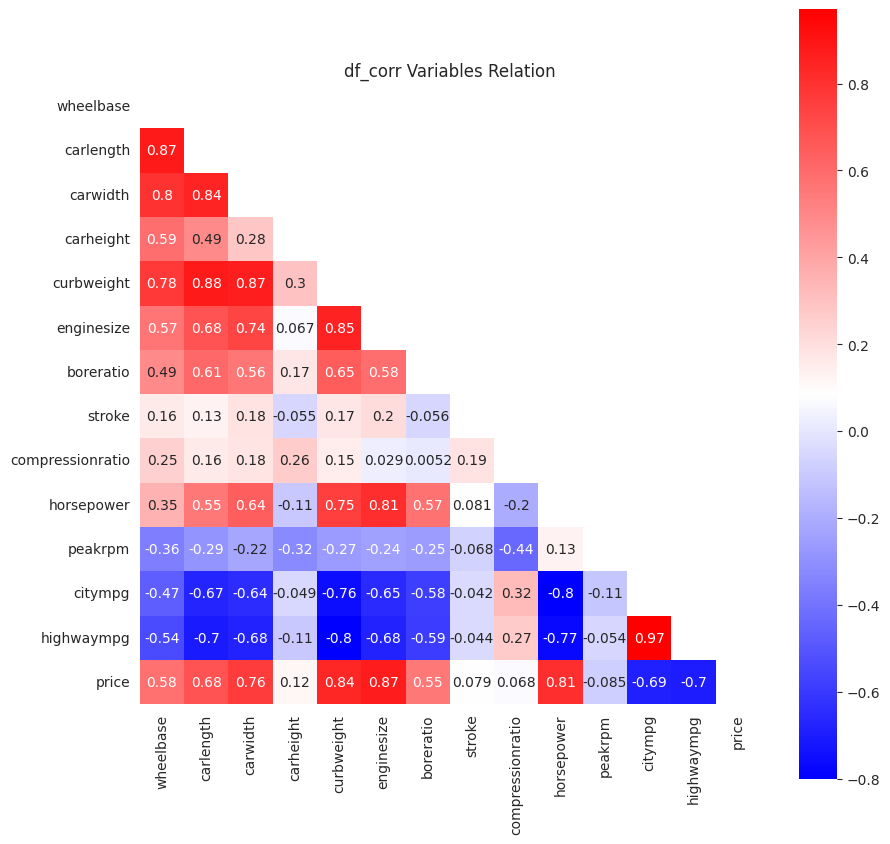

In [49]:
#绘制相关性热力图
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax=sns.heatmap(df_corr,mask=mask,square=True,annot=True,cmap='bwr')
ax.set_title("df_corr Variables Relation")
plt.show()

相关系数分类： 0.8-1.0 极强相关；0.6-0.8 强相关；0.4-0.6 中等程度相关；0.2-0.4 弱相关；0.0-0.2 极弱相关或无相关

由上面热力图可看出： 车长、宽、轴距三者都极强相关，整备质量和车长、宽、发动机尺寸极强相关，价格与车整备质量、发动机尺寸、马力具有极强相关性，等等。部分数据之间存在高度相似，数据存在冗余。 下面我们根据我们数据挖掘的结果进行数据预处理

In [50]:
#carSize可代表车型大小，剔除carlength
features=car_df.drop(['carlength'],axis=1)

In [51]:
# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
from sklearn.preprocessing import LabelEncoder
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1

In [52]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)

features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


对数值型数据进行one-hot编码后，数据变量由原来24列变为47列，维度变大。

In [53]:
#对数值型数据进行归一化
from sklearn import preprocessing

features1=preprocessing.MinMaxScaler().fit_transform(features1)
features1=pd.DataFrame(features1)
features1.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


利用PCA对高维数据进行降维 目的：在‘信息’损失较小的前提下，将高维数据转换到低维，从而减少计算量。把可能具有线性相关的高维变量合成线性无关的低维变量，成为主成分。保留最大的方差方向，使从变换特征回到原始特征的误差最小。

In [54]:
#对数据集进行PCA降维（信息保留为99.99%）
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9999)  #保证降维后的数据保持90%的信息，则填0.9
features2=pca.fit_transform(features1)

#降维后，每个主要成分的解释方差占比（解释PC携带的信息多少）
ratio=pca.explained_variance_ratio_
print('各主成分的解释方差占比：',ratio)

#降维后有几个成分
print('降维后有几个成分：',len(ratio))

#累计解释方差占比
cum_ratio=np.cumsum(ratio)
print('累计解释方差占比：',cum_ratio)

各主成分的解释方差占比： [2.39780781e-01 2.00631256e-01 1.19647716e-01 6.96158725e-02
 6.26813731e-02 4.62476101e-02 4.18234241e-02 3.29587027e-02
 2.56724995e-02 2.20879580e-02 1.96367534e-02 1.62909630e-02
 1.46554010e-02 1.37454104e-02 1.07092251e-02 9.71883628e-03
 8.63702444e-03 7.92104086e-03 6.68243901e-03 5.57160062e-03
 4.42099290e-03 3.83735876e-03 3.15124051e-03 2.71801338e-03
 2.28419651e-03 1.78287025e-03 1.47721184e-03 1.15039081e-03
 1.10987714e-03 9.48527208e-04 6.71068839e-04 4.98987159e-04
 4.35515101e-04 3.22617234e-04 1.86844410e-04 1.16073554e-04
 1.07112858e-04]
降维后有几个成分： 37
累计解释方差占比： [0.23978078 0.44041204 0.56005975 0.62967563 0.692357   0.73860461
 0.78042803 0.81338674 0.83905924 0.86114719 0.88078395 0.89707491
 0.91173031 0.92547572 0.93618495 0.94590378 0.95454081 0.96246185
 0.96914429 0.97471589 0.97913688 0.98297424 0.98612548 0.98884349
 0.99112769 0.99291056 0.99438777 0.99553816 0.99664804 0.99759657
 0.99826764 0.99876662 0.99920214 0.99952476 0.9997116  0.99982

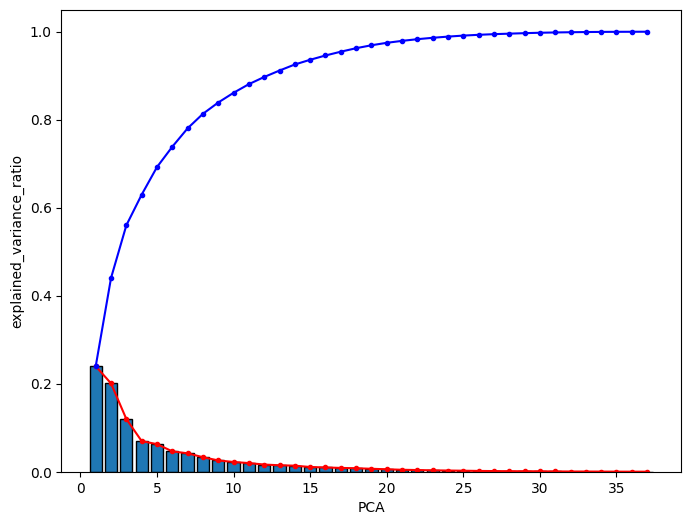

In [55]:
#绘制PCA降维后各成分方差占比的直方图和累计方差占比折线图
plt.figure(figsize=(8,6))
X=range(1,len(ratio)+1)
Y=ratio
plt.bar(X,Y,edgecolor='black')
plt.plot(X,Y,'r.-')
plt.plot(X,cum_ratio,'b.-')
plt.ylabel('explained_variance_ratio')
plt.xlabel('PCA')
plt.show()

In [56]:
#PCA选择降维保留7个主要成分
pca=PCA(n_components=8) 
features3=pca.fit_transform(features1)

#降维后的累计各成分方差占比和（即解释PC携带的信息多少）
print(sum(pca.explained_variance_ratio_))

0.8133867361927236



二、DBSCAN聚类


In [57]:
import numpy as np
import mindspore
from mindspore import numpy as mnp
class DBSCAN:
    def __init__(
        self,
        eps=0.5,
        min_samples=5,
        metric="euclidean",
        algorithm="auto",
        leaf_size=30,
        p=None
    ):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.algorithm = algorithm
        self.leaf_size = leaf_size
        self.p = p
        self.labels_=[]

    def fit(self, X, sample_weight=None):
        self.n_samples = len(X)
        self.visited = np.zeros(self.n_samples, dtype=bool)
        self.core_samples = np.zeros_like(self.visited, dtype=bool)
        self.labels_ = np.zeros(self.n_samples, dtype=int) - 1
        self.curr_label = 0

        if self.metric != "euclidean":
            raise ValueError("Only Euclidean distance is supported.")

        neighbours = self._neighbours(X)
        self._dbscan(X, neighbours, sample_weight)
        return self.labels_

    def fit_predict(self, X, sample_weight=None):
        return self.fit(X, sample_weight)

    def _dbscan(self, X, neighbours, sample_weight=None):
        for i in range(self.n_samples):
            if self.visited[i]:
                continue
            self.visited[i] = True

            if len(neighbours[i]) >= self.min_samples:
                self._expand_cluster(X, i, neighbours, sample_weight)

    def _expand_cluster(self, X, i, neighbours, sample_weight=None):
        self.labels_[i] = self.curr_label
        self.core_samples[i] = True

        while neighbours[i].size > 0:
            j = neighbours[i][-1]
            neighbours[i] = neighbours[i][:-1]

            if not self.visited[j]:
                self.visited[j] = True

                new_neighbours = neighbours[j]
                if new_neighbours.size >= self.min_samples:
                    neighbours[i] = np.union1d(neighbours[i], new_neighbours)

            if self.labels_[j] == -1:
                self.labels_[j] = self.curr_label
                self.core_samples[j] = True

        self.curr_label += 1

    def _neighbours(self, X):
        dist_matrix = self._dist_matrix(X)
        return [np.where(dist_matrix[i] <= self.eps)[0] for i in range(self.n_samples)]

    def _dist_matrix(self, X):
        dist_matrix = np.zeros((self.n_samples, self.n_samples))

        for i in range(self.n_samples):
            for j in range(i + 1, self.n_samples):
                dist_matrix[i, j] = dist_matrix[j, i] = np.linalg.norm(X[i] - X[j])

        return dist_matrix

In [111]:
model=DBSCAN(eps=1.15,min_samples=8)
prediction=model.fit(features3)
print(prediction)
df=pd.value_counts(prediction)

[ 0  0  0  1  1 -1  1  4 -1  2  0  1  0  1  1  1  0  1  3  3  1  3  3  2
  4  1  1 -1  4  2  3  3  3  3  3  1  4  3  3  1  1  1  3 -1  3  1  0  1
  1  0  3  3  3  1  1  0  0  0  0  3  1  3  1 -1  4  1 -1 -1 -1 -1 -1  1
  0  1  0  2  3  3  3  2  2  3  2  2  2  1  1 -1  1  3 -1  3  1  4  3  3
  1  4  3  4  1  1 -1  1  0 -1  0  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  3  2
  4  1  1  4  2  0  0  0  0  0  4  3  3  1  3  1 -1 -1  3  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3  3  4  4  4  4  1  4 -1 -1  1  4  1 -1  0  0  0  0
  0  0  0  0  0  1 -1  4  1  4  0  0  1 -1 -1 -1 -1  1  1 -1  1  3  3  1
 -1  4  1 -1  1 -1 -1 -1  1 -1  1 -1 -1]


<AxesSubplot:>

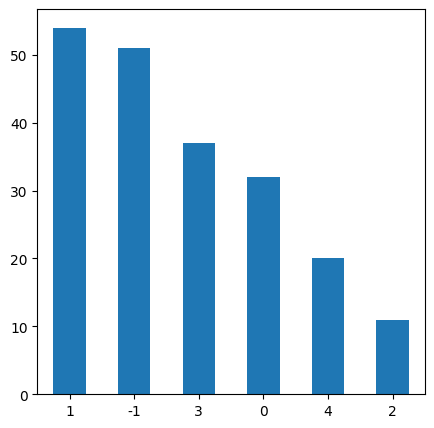

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
df.plot.bar(rot=0)

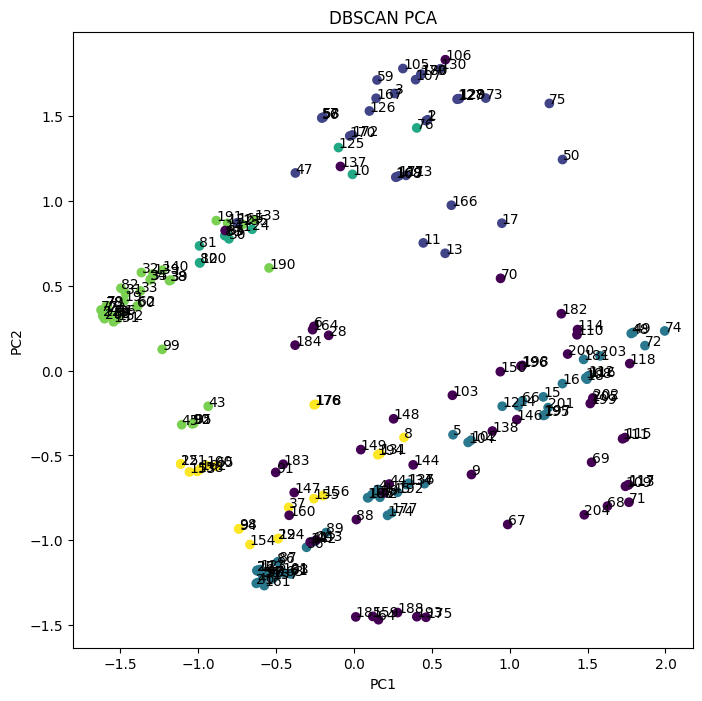

In [113]:
#绘制聚类结果2维的散点图
plt.figure(figsize=(8,8))
plt.scatter(features3[:,0],features3[:,1],c=prediction)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_price.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN PCA')
plt.show()

上面以占比最大的前2个主成分画出的二维散点图,发现各个簇之间的距离比较远，效果似乎不是很好。 考虑到保留的主成分为8个，且前两个主成分累计可解释方差占比仅约为44%，损失信息较多，所以尝试利用前3个主成分画3d效果图再查看。

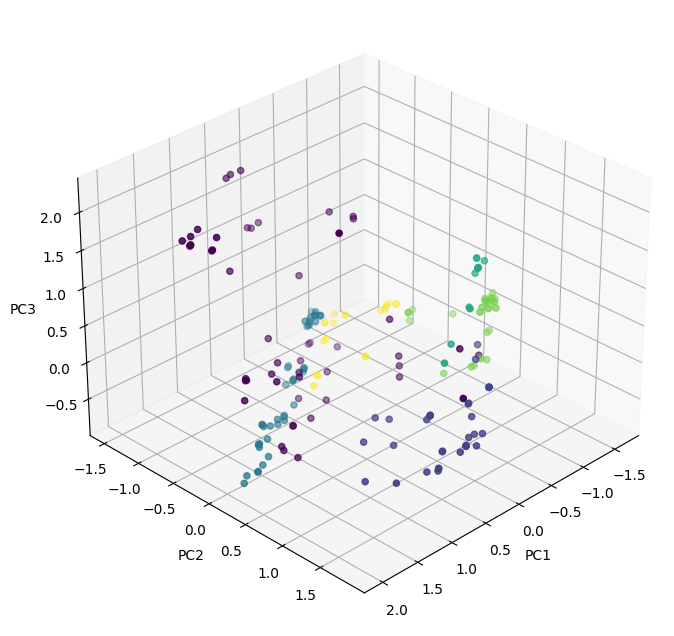

In [114]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=prediction)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [115]:
car_df_db=car_price.copy()
car_df_db['db_cluster']=prediction
car_df_db.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,db_cluster
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,A0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,A0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,A,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,A,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,A,1


In [116]:
#统计聚类后每个集群的车型数
car_df_db.groupby('db_cluster')['car_ID'].count()

db_cluster
-1    51
 0    32
 1    54
 2    11
 3    37
 4    20
Name: car_ID, dtype: int64

In [117]:
    #统计每个集群各个品牌的车型数
car_df_db.groupby(by=['db_cluster','carBrand'])['car_ID'].count()

db_cluster  carBrand  
-1          audi          2
            buick         4
            dodge         1
            isuzu         1
            mazda         2
                         ..
 4          nissan        3
            plymouth      2
            renault       1
            toyota        8
            volkswagen    1
Name: car_ID, Length: 66, dtype: int64

In [118]:
#统计每个品牌所属各个集群的车型数
car_df_db.groupby(by=['carBrand','db_cluster'])['db_cluster'].count()

carBrand     db_cluster
alfa-romero   0            3
audi         -1            2
              1            3
              2            1
              4            1
                          ..
volkswagen    1            4
              3            2
              4            1
volvo        -1            7
              1            4
Name: db_cluster, Length: 66, dtype: int64

In [119]:
#查看特指车名‘vokswagen’车型的聚类集群
df=car_df_db.loc[:,['car_ID','CarName','carBrand','db_cluster']]
print(df.loc[df['CarName'].str.contains("vokswagen")])

     car_ID           CarName    carBrand  db_cluster
182     183  vokswagen rabbit  volkswagen          -1


In [120]:
#查看特指车名为‘vokswagen’车型的竞品车型（分类-1的所有车型）
df.loc[df['db_cluster']==-1]

,car_ID,CarName,carBrand,db_cluster
5,6,audi fox,audi,-1
8,9,audi 4000,audi,-1
27,28,dodge coronet custom,dodge,-1
43,44,isuzu MU-X,isuzu,-1
63,64,mazda glc deluxe,mazda,-1
66,67,mazda rx-7 gs,mazda,-1
67,68,buick electra 225 custom,buick,-1
68,69,buick century luxus (sw),buick,-1
69,70,buick century,buick,-1
70,71,buick skyhawk,buick,-1


In [122]:
#查看大众volkswagen品牌各集群内的竞品车型
df_volk=df.loc[df['db_cluster']<5].sort_values(by=['db_cluster','carBrand'])
df_volk

,car_ID,CarName,carBrand,db_cluster
5,6,audi fox,audi,-1
8,9,audi 4000,audi,-1
67,68,buick electra 225 custom,buick,-1
68,69,buick century luxus (sw),buick,-1
69,70,buick century,buick,-1
...,...,...,...,...
157,158,toyota corolla 1200,toyota,4
161,162,toyota corolla,toyota,4
175,176,toyota corona,toyota,4
177,178,toyota mark ii,toyota,4


In [69]:
#提取分类为0的所有车型特征数据
df0=car_df_db.loc[car_df_db['db_cluster']==-1]
df0

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,db_cluster
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.0,audi,A,-1
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.0,audi,B,-1
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,...,3.39,7.6,102,5500,24,30,8558.0,dodge,A0,-1
43,44,0,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,...,3.23,8.5,78,4800,24,29,6785.0,isuzu,A,-1
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,3.39,22.7,64,4650,36,42,10795.0,mazda,A,-1
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,3.64,22.0,72,4200,31,39,18344.0,mazda,A,-1
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,3.64,21.5,123,4350,22,25,25552.0,buick,B,-1
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,3.64,21.5,123,4350,22,25,28248.0,buick,B,-1
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,3.64,21.5,123,4350,22,25,28176.0,buick,B,-1
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,3.64,21.5,123,4350,22,25,31600.0,buick,D,-1


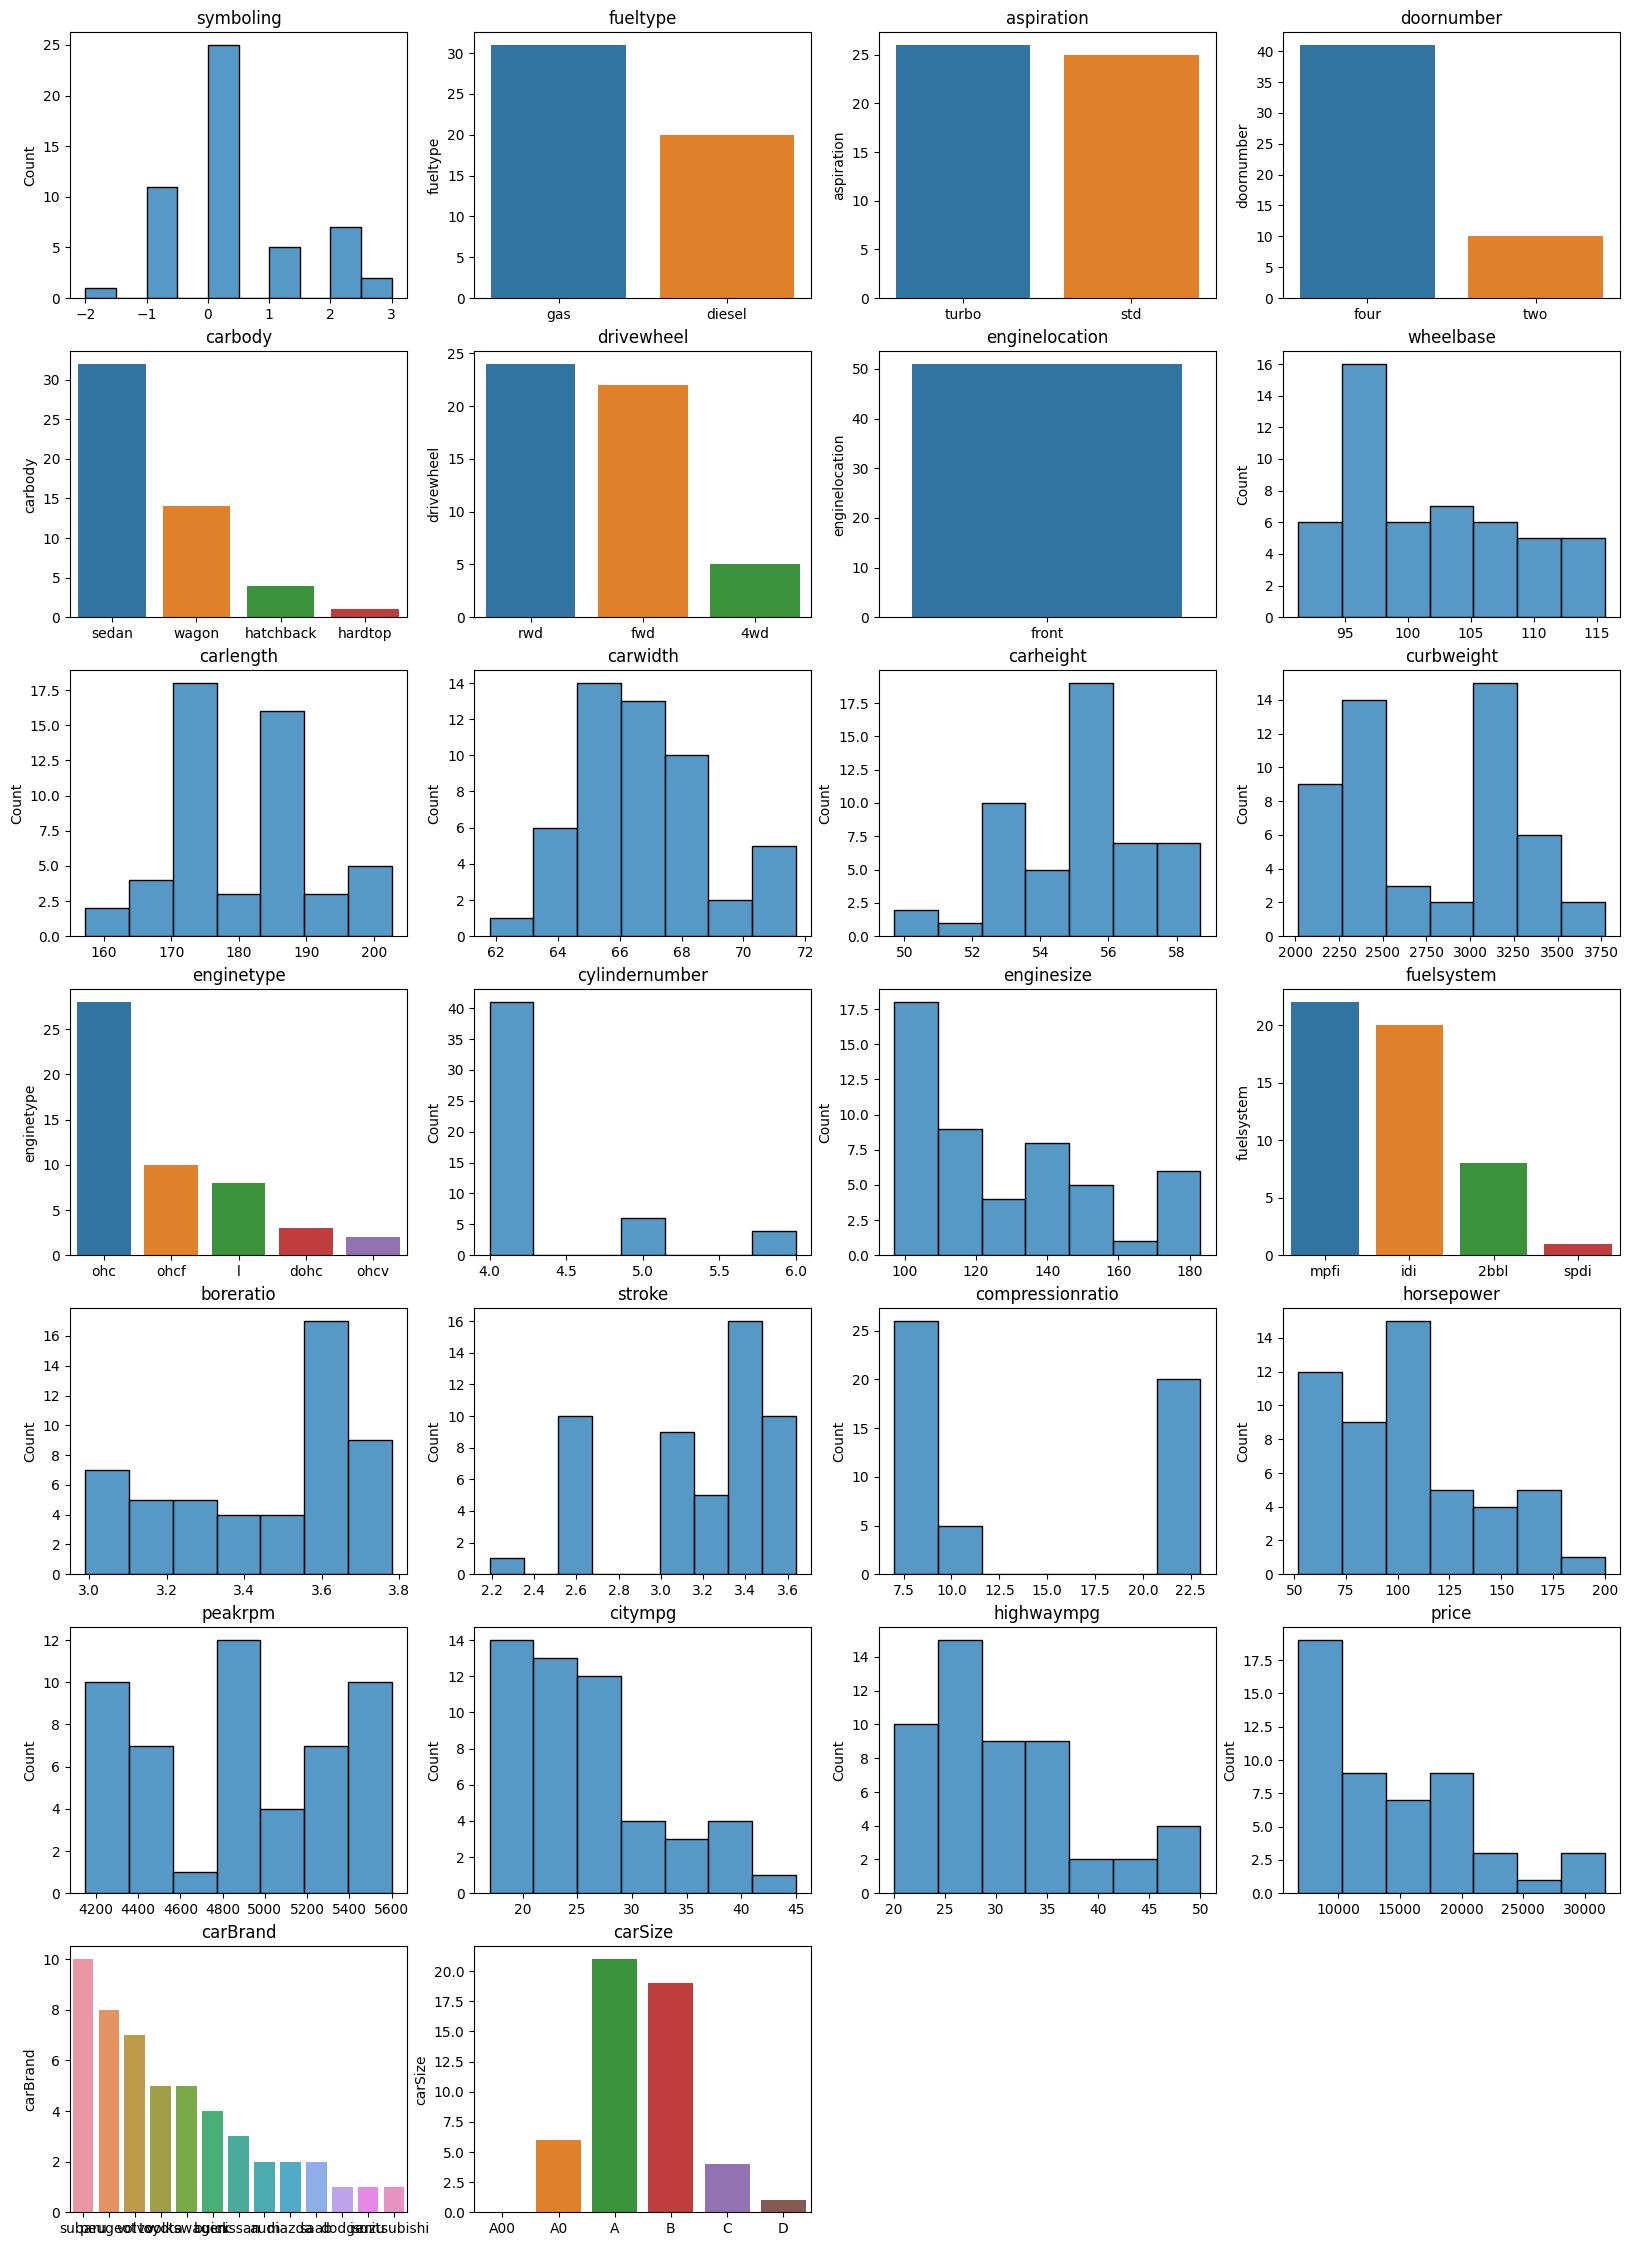

In [70]:
df0_1=df0.drop(['car_ID','CarName','db_cluster'],axis=1)

#查看集群-1的车型所有特征分布
fig=plt.figure(figsize=(20,20))
i=1
for c in df0_1.columns:
    ax=fig.add_subplot(7,4,i)
    if df0_1[c].dtypes=='int' or df0_1[c].dtypes=='float':
        sns.histplot(df0_1[c],ax=ax)
    else:
        sns.barplot(x=df0_1[c].value_counts().index,y=df0_1[c].value_counts(),ax=ax)
    i=i+1
    plt.xlabel('')
    plt.title(c)  
plt.subplots_adjust(top=1.2)


plt.show()

三、Minikmeans

In [71]:
# 导入必要的库
import numpy as np
import mindspore
from mindspore import numpy as mnp
# 定义 MiniBatchKMeans 类
class MiniBatchKMeans:
    def __init__(self, n_clusters=8, batch_size=100, max_iter=100, random_state=None):
        self.n_clusters = n_clusters  # 聚类簇数
        self.batch_size = batch_size  # 批次大小
        self.max_iter = max_iter  # 最大迭代次数
        self.random_state = random_state  # 随机数生成器种子
    def fit(self, X):
        n_samples, n_features = X.shape  # 获取样本数和特征数
        if self.batch_size > n_samples:  # 如果批次大小大于样本数，调整批次大小
            self.batch_size = n_samples
        rng = np.random.RandomState(self.random_state)  # 定义随机数生成器，种子为 self.random_state
        centroids = rng.randn(self.n_clusters, n_features) * 0.01  # 使用随机数生成器生成聚类中心
        idx = 0  # 初始化下标
        for i in range(self.max_iter):  # 开始迭代
            X_batch = X[idx:idx+self.batch_size]  # 获取当前批次数据
            idx = (idx + self.batch_size) % n_samples  # 更新下标
            # 计算点到中心的距离，获取与每个中心最近的标签
            distances = np.sqrt(((X_batch - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            # 更新中心
            for k in range(self.n_clusters):
                mask = (labels == k)
                if mask.any():
                    centroids[k] = X_batch[mask].mean(axis=0)
        self.cluster_centers_ = centroids  # 保存聚类中心
        self.labels_ = self.predict(X)  # 预测每个数据点所属的聚类标签
        self.inertia_ = self._compute_inertia(X)  # 计算样本的误差平方和
        return self
    def _compute_inertia(self, X):
        # 计算样本的误差平方和
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return (distances.min(axis=0)**2).sum()
    def predict(self, X):
        # 预测每个数据点所属的聚类标签
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    def fit_predict(self, X):
        self.fit(X)  # 拟合模型
        return self.labels_  # 返回标签

In [72]:
model=MiniBatchKMeans(n_clusters=6,batch_size=100,max_iter=100,random_state=0)
model.fit(features3)
prediction=model.predict(features3)
print(prediction)
df=pd.value_counts(prediction)

[0 0 0 4 4 5 4 4 4 1 0 3 0 3 3 3 0 3 5 5 4 5 5 1 4 4 4 1 4 1 5 5 5 5 5 4 4
 5 5 4 4 4 5 4 5 4 5 3 3 0 5 5 5 4 4 0 0 0 0 5 4 5 4 2 4 3 2 2 2 2 2 3 0 3
 0 1 5 5 5 1 1 5 1 1 1 4 4 4 4 5 2 5 4 4 5 5 4 4 5 4 4 3 3 3 0 0 0 3 2 3 2
 3 2 3 2 3 2 3 5 1 4 4 4 4 1 0 0 0 0 0 4 5 5 4 5 4 1 3 5 5 5 4 4 4 4 3 4 4
 4 3 5 5 4 4 4 4 4 4 2 2 4 4 4 5 5 0 0 0 0 0 0 0 0 4 2 4 4 4 0 0 3 3 2 5 2
 4 4 2 4 5 5 4 2 4 3 3 3 3 3 3 3 3 3 2 3]


<AxesSubplot:>

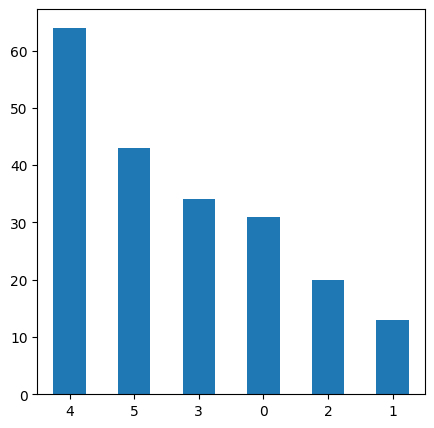

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
df.plot.bar(rot=0)

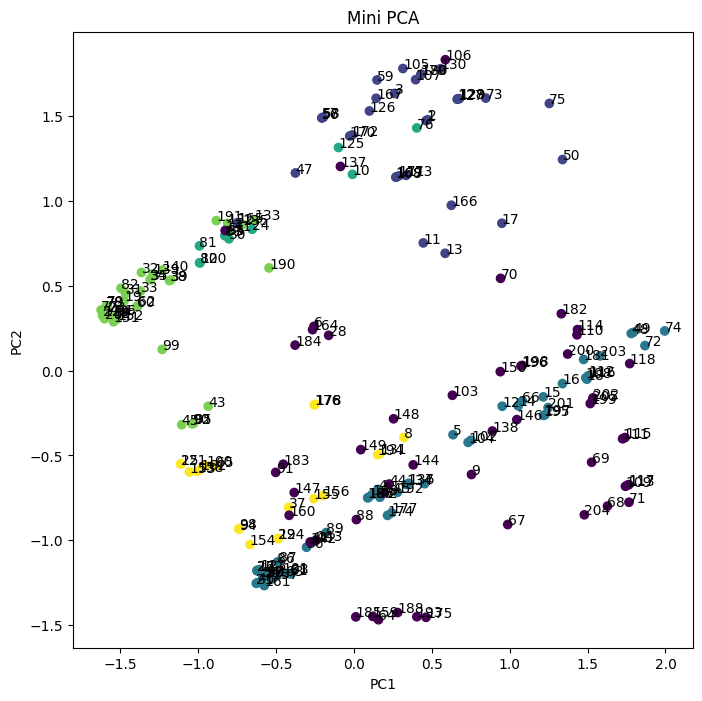

In [123]:
#绘制聚类结果2维的散点图
plt.figure(figsize=(8,8))
plt.scatter(features3[:,0],features3[:,1],c=prediction)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_price.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mini PCA')
plt.show()

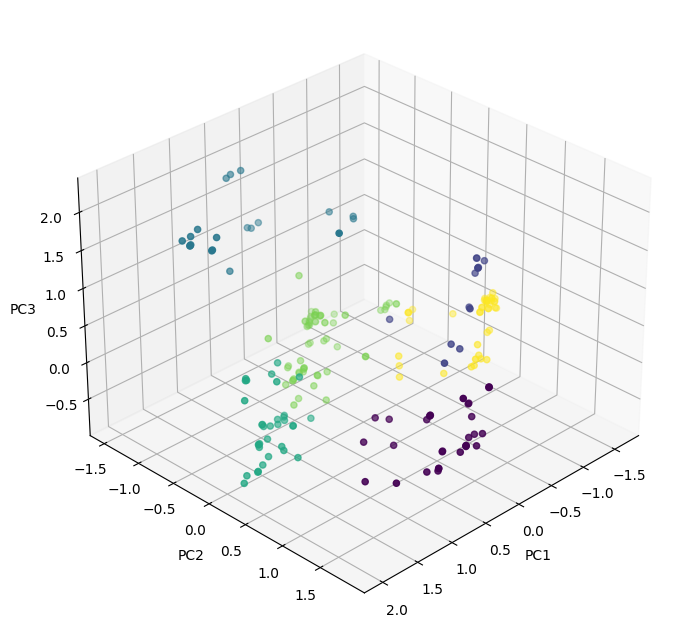

In [75]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=prediction)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [76]:
car_df_mini=car_price.copy()
car_df_mini['mini_cluster']=prediction
car_df_mini.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,mini_cluster
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,A0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,A0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,A,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,A,4
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,A,4


In [124]:
#统计聚类后每个集群的车型数
car_df_mini.groupby('mini_cluster')['car_ID'].count()

mini_cluster
0    31
1    13
2    20
3    34
4    64
5    43
Name: car_ID, dtype: int64

In [125]:
    #统计每个集群各个品牌的车型数
car_df_mini.groupby(by=['mini_cluster','carBrand'])['car_ID'].count()

mini_cluster  carBrand   
0             alfa-romero     3
              bmw             3
              buick           2
              jaguar          1
              mazda           4
              nissan          3
              porsche         5
              toyota         10
1             audi            1
              dodge           3
              mercury         1
              mitsubishi      5
              plymouth        2
              saab            1
2             buick           4
              mazda           2
              nissan          1
              peugeot         5
              toyota          3
              volkswagen      4
              volvo           1
3             bmw             5
              buick           2
              jaguar          2
              mazda           1
              nissan          3
              peugeot         6
              saab            1
              subaru          2
              toyota          2
              

In [79]:
#统计每个品牌所属各个集群的车型数
car_df_mini.groupby(by=['carBrand','mini_cluster'])['mini_cluster'].count()

carBrand     mini_cluster
alfa-romero  0                3
audi         1                1
             4                5
             5                1
bmw          0                3
             3                5
buick        0                2
             2                4
             3                2
chevrolet    4                1
             5                2
dodge        1                3
             4                4
             5                2
honda        4                5
             5                8
isuzu        4                2
             5                2
jaguar       0                1
             3                2
mazda        0                4
             2                2
             3                1
             4                5
             5                5
mercury      1                1
mitsubishi   1                5
             4                4
             5                4
nissan       0                3
             2

In [80]:
#查看特指车名‘vokswagen’车型的聚类集群
df=car_df_mini.loc[:,['car_ID','CarName','carBrand','mini_cluster']]
print(df.loc[df['CarName'].str.contains("vokswagen")])

     car_ID           CarName    carBrand  mini_cluster
182     183  vokswagen rabbit  volkswagen             2


In [81]:
#查看特指车名为‘vokswagen’车型的竞品车型（分类2的所有车型）
df.loc[df['mini_cluster']==2]

,car_ID,CarName,carBrand,mini_cluster
63,64,mazda glc deluxe,mazda,2
66,67,mazda rx-7 gs,mazda,2
67,68,buick electra 225 custom,buick,2
68,69,buick century luxus (sw),buick,2
69,70,buick century,buick,2
70,71,buick skyhawk,buick,2
90,91,nissan gt-r,nissan,2
108,109,peugeot 304,peugeot,2
110,111,peugeot 504,peugeot,2
112,113,peugeot 604sl,peugeot,2


In [82]:
#查看大众volkswagen品牌各集群内的竞品车型
df_volk=df.loc[df['mini_cluster']<3].sort_values(by=['mini_cluster','carBrand'])
df_volk

,car_ID,CarName,carBrand,mini_cluster
0,1,alfa-romero giulia,alfa-romero,0
1,2,alfa-romero stelvio,alfa-romero,0
2,3,alfa-romero Quadrifoglio,alfa-romero,0
10,11,bmw 320i,bmw,0
12,13,bmw x1,bmw,0
...,...,...,...,...
182,183,vokswagen rabbit,volkswagen,2
184,185,volkswagen model 111,volkswagen,2
187,188,volkswagen super beetle,volkswagen,2
192,193,volkswagen rabbit custom,volkswagen,2


In [83]:
#提取分类为2的所有车型特征数据
df0=car_df_mini.loc[car_df_mini['mini_cluster']==2]
df0

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,mini_cluster
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,3.39,22.7,64,4650,36,42,10795.0,mazda,A,2
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,3.64,22.0,72,4200,31,39,18344.0,mazda,A,2
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,3.64,21.5,123,4350,22,25,25552.0,buick,B,2
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,3.64,21.5,123,4350,22,25,28248.0,buick,B,2
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,3.64,21.5,123,4350,22,25,28176.0,buick,B,2
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,3.64,21.5,123,4350,22,25,31600.0,buick,D,2
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,3.47,21.9,55,4800,45,50,7099.0,nissan,A0,2
108,109,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,107.9,...,3.52,21.0,95,4150,28,33,13200.0,peugeot,B,2
110,111,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,114.2,...,3.52,21.0,95,4150,25,25,13860.0,peugeot,C,2
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,3.52,21.0,95,4150,28,33,16900.0,peugeot,B,2


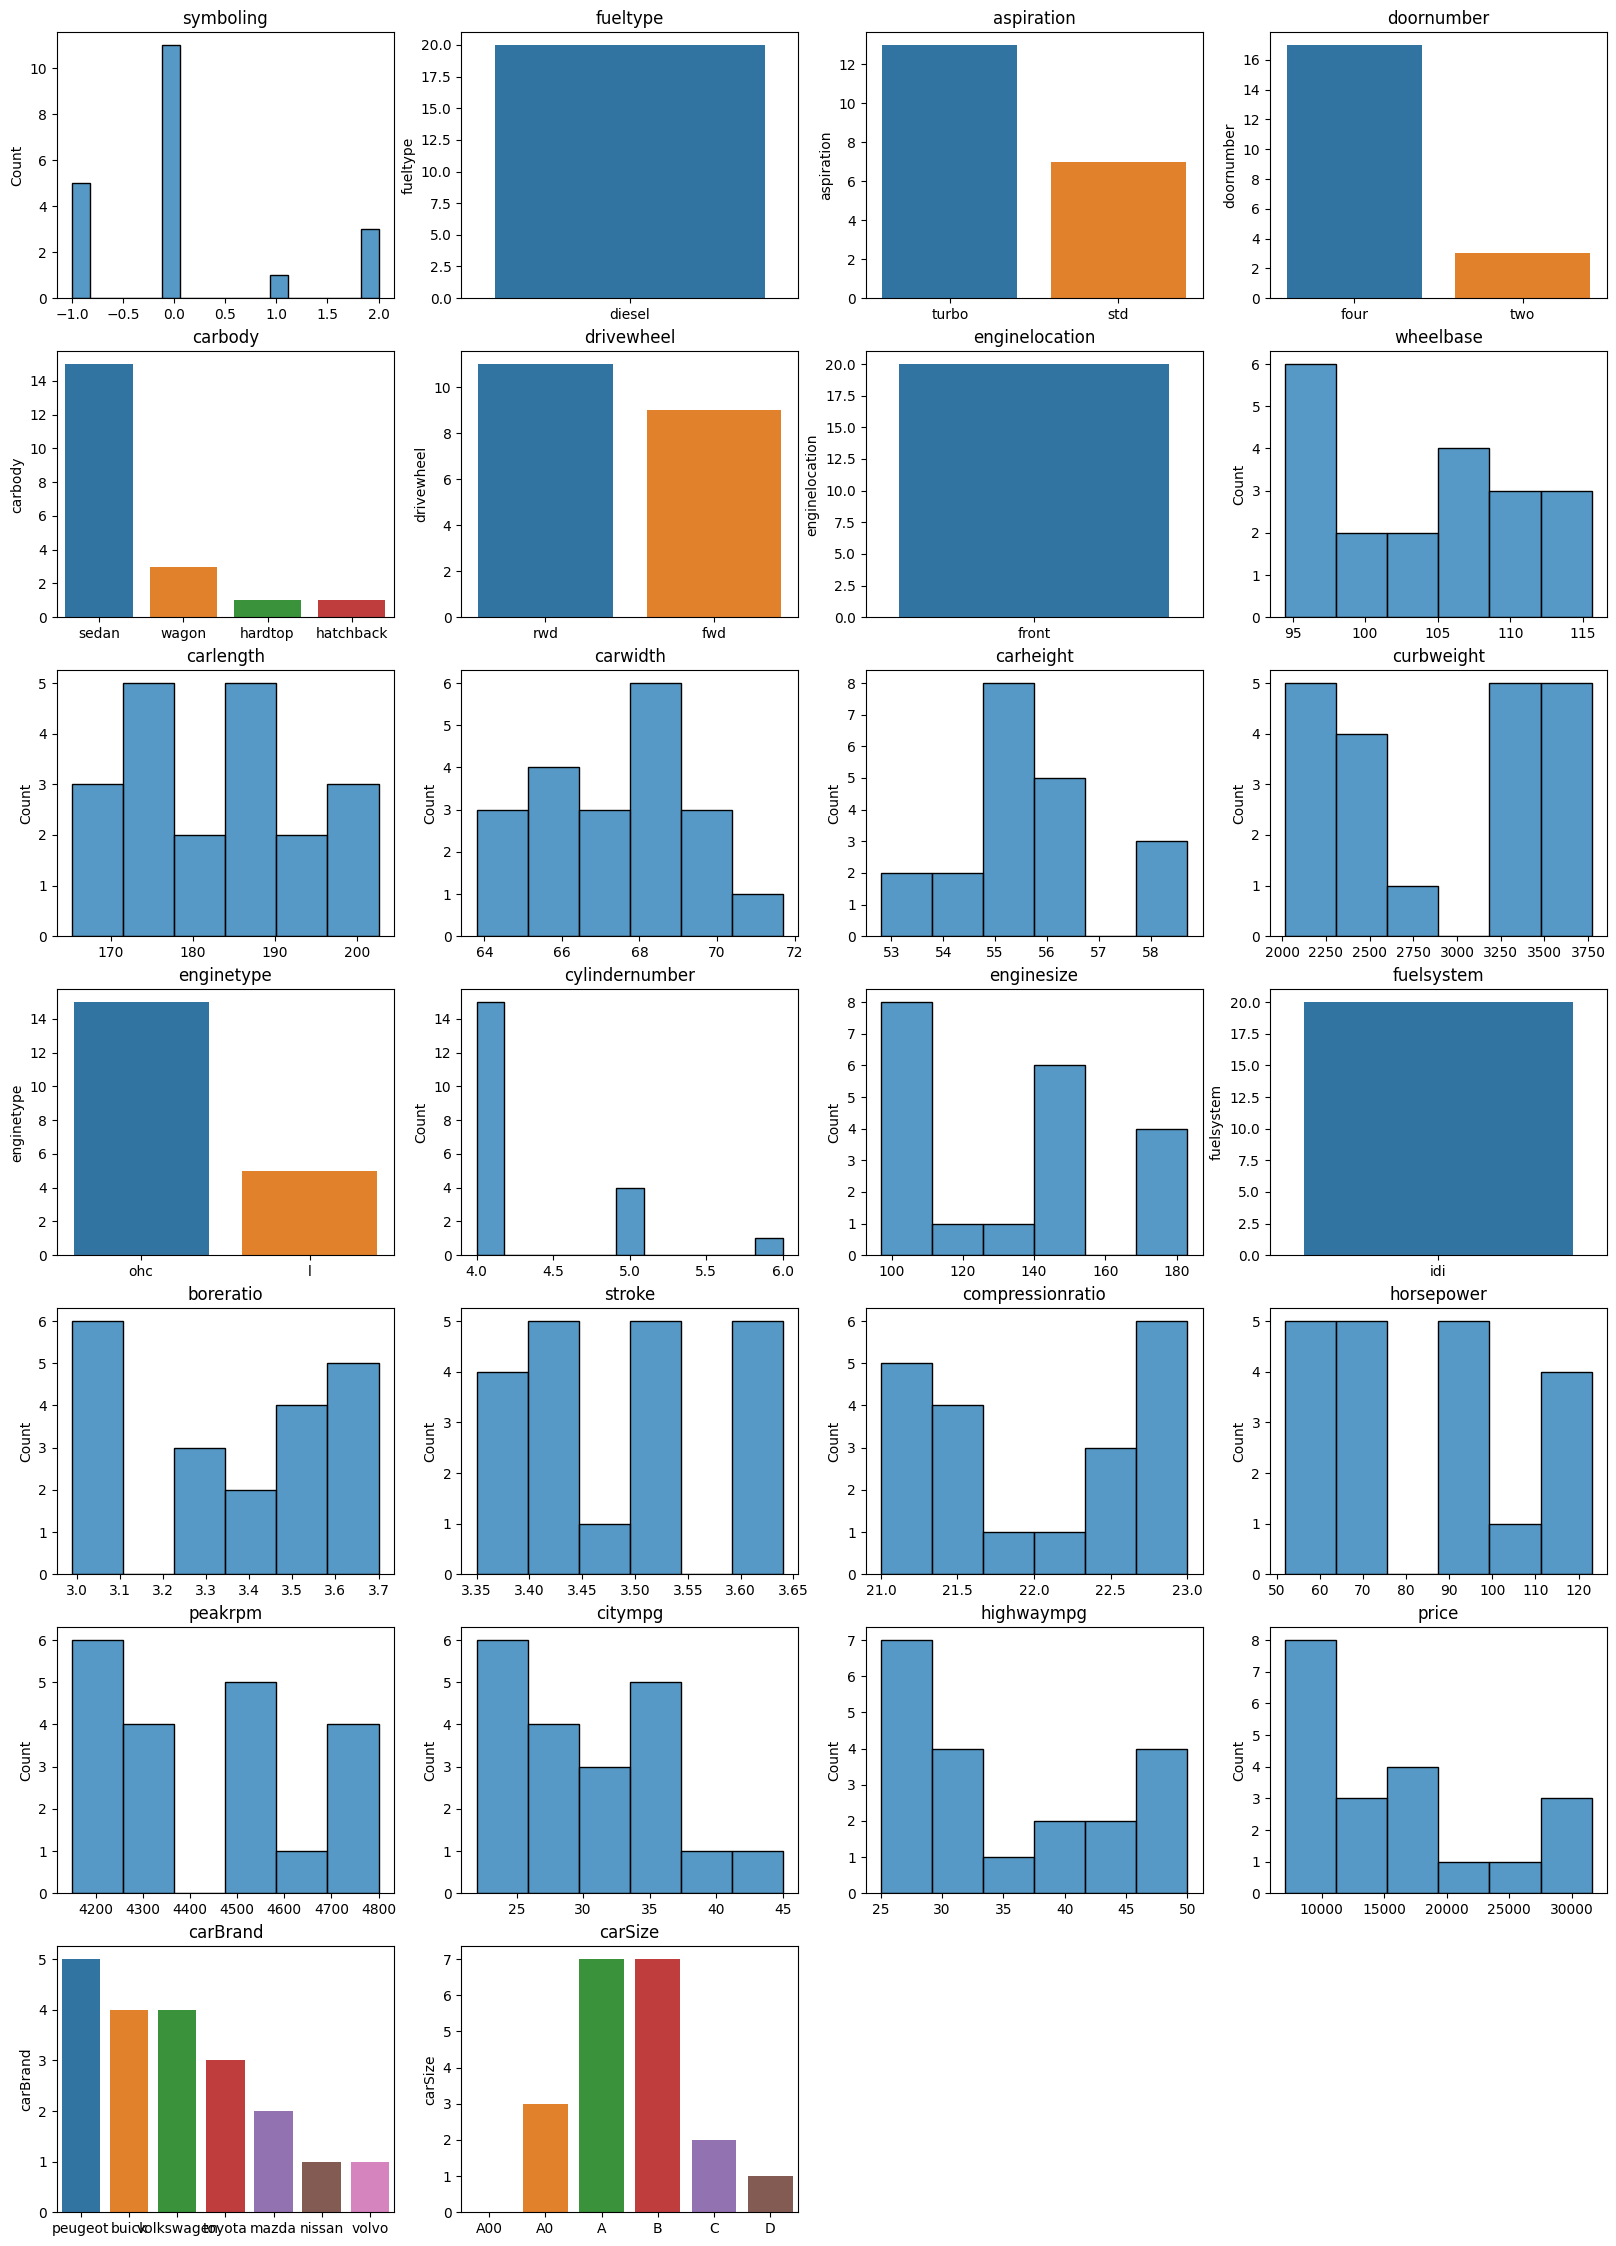

In [84]:
df0_1=df0.drop(['car_ID','CarName','mini_cluster'],axis=1)

#查看集群0的车型所有特征分布
fig=plt.figure(figsize=(20,20))
i=1
for c in df0_1.columns:
    ax=fig.add_subplot(7,4,i)
    if df0_1[c].dtypes=='int' or df0_1[c].dtypes=='float':
        sns.histplot(df0_1[c],ax=ax)
    else:
        sns.barplot(x=df0_1[c].value_counts().index,y=df0_1[c].value_counts(),ax=ax)
    i=i+1
    plt.xlabel('')
    plt.title(c)  
plt.subplots_adjust(top=1.2)


plt.show()

四、KMeans

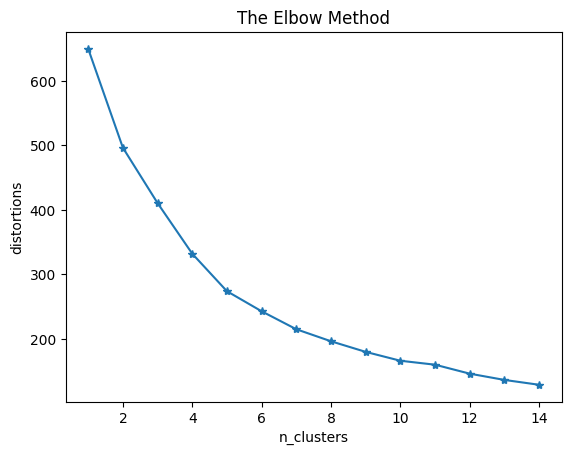

In [85]:
##肘方法看k值，簇内离差平方和
#对每一个k值进行聚类并且记下对于的SSE，然后画出k和SSE的关系图
from sklearn.cluster import KMeans

sse=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features3)
    sse.append(km.inertia_)

plt.plot(range(1,15),sse,marker='*')
plt.xlabel('n_clusters')
plt.ylabel('distortions')
plt.title("The Elbow Method")
plt.show()

In [86]:
import numpy as np
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances

In [87]:
'''定义KMeans类'''
import numpy as np
import random
import mindspore
from mindspore import Tensor
from mindspore import numpy as mnp
class KMeansCluster:
    def __init__(self, n_clusters=2, max_iter=1000, varepsilon=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.varepsilon = varepsilon
        np.random.seed(1)
    #从样本中随机选取k个样本作为初始聚类中心点
    def init_random_centroids(self, X):
        n_samples, n_features = X.shape
        centroids = np.zeros((self.n_clusters, n_features))
        for i in range(self.n_clusters):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids
    #返回距离该样本最近的一个中心索引[0,k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i
    #进行聚类
    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.n_clusters)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters
    #更新中心
    def update_centroids(self, clusters, X):
        n_features = X.shape[1]
        centroids = np.zeros((self.n_clusters, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids
    #将所有样本进行归类
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(X.shape[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred
    #进行聚类，返回标签
    def predict(self, X):
        centroids = self.init_random_centroids(X)
        for _ in range(self.max_iter):
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids
            #更新
            centroids = self.update_centroids(clusters, X)
            #收敛
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break
        return self.get_cluster_labels(clusters, X)

In [94]:
model=KMeansCluster(n_clusters=5,max_iter=1000)
# model.fit(features3)
y_pred=model.predict(features3)
print(prediction)

[2. 2. 2. 3. 3. 0. 3. 3. 3. 2. 2. 3. 2. 3. 3. 3. 2. 3. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 3. 0. 1. 0. 1. 2. 3.
 3. 2. 0. 0. 0. 1. 1. 2. 2. 2. 2. 0. 1. 0. 1. 4. 1. 3. 4. 4. 4. 4. 4. 3.
 2. 3. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 4. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 3. 3. 3. 2. 2. 2. 3. 4. 3. 4. 3. 4. 3. 4. 3. 4. 3. 0. 0.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 0. 0. 3. 0. 3. 2. 3. 0. 0. 0. 1. 1. 3.
 1. 3. 1. 3. 1. 3. 0. 0. 1. 1. 1. 1. 1. 1. 4. 4. 1. 1. 1. 0. 0. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 4. 3. 3. 3. 2. 2. 3. 3. 4. 0. 4. 3. 3. 4. 3. 0. 0. 3.
 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3.]


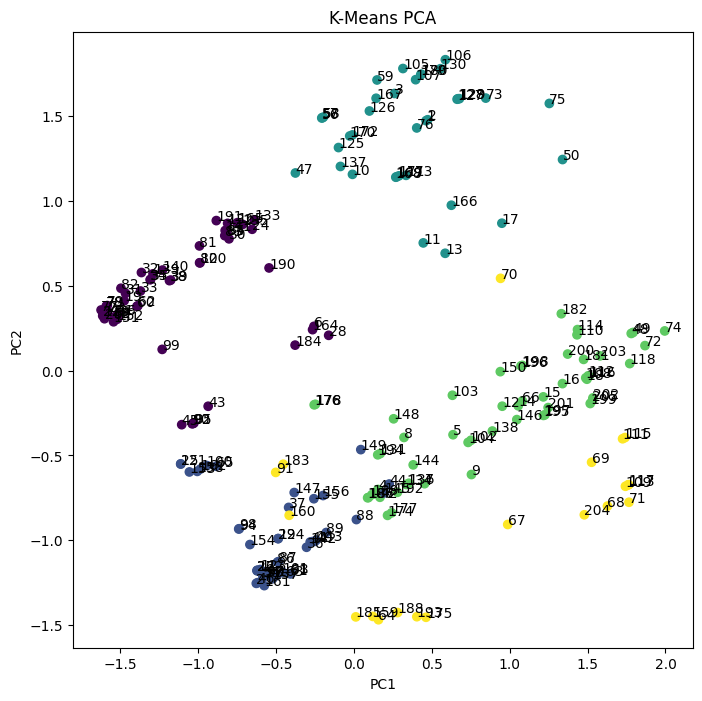

In [95]:
#绘制聚类结果2维的散点图
plt.figure(figsize=(8,8))
plt.scatter(features3[:,0],features3[:,1],c=prediction)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_price.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means PCA')
plt.show()

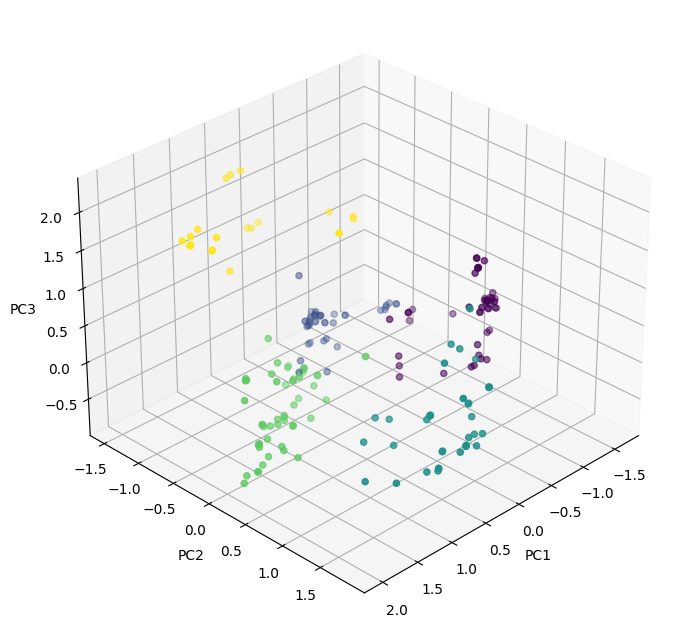

In [96]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=prediction)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [97]:
#将聚类后的类目放入原特征数据中
car_df_km=car_price.copy()
car_df_km['km_result']=y_pred
car_df_km.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,km_result
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,A0,2.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,A0,2.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,A,2.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,A,3.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,A,3.0


In [98]:
#统计聚类后每个集群的车型数
car_df_km.groupby('km_result')['car_ID'].count()

km_result
0.0    51
1.0    44
2.0    36
3.0    54
4.0    20
Name: car_ID, dtype: int64

In [99]:
    #统计每个集群各个品牌的车型数
car_df_km.groupby(by=['km_result','carBrand'])['car_ID'].count()

km_result  carBrand   
0.0        audi            1
           chevrolet       2
           dodge           5
           honda           8
           isuzu           1
           mazda           5
           mitsubishi      9
           nissan          5
           plymouth        2
           renault         1
           saab            2
           subaru          3
           toyota          4
           volkswagen      3
1.0        chevrolet       1
           dodge           4
           honda           4
           isuzu           2
           mazda           5
           mitsubishi      4
           nissan          6
           plymouth        4
           subaru          5
           toyota          9
2.0        alfa-romero     3
           audi            1
           bmw             3
           buick           2
           isuzu           1
           jaguar          1
           mazda           4
           mercury         1
           nissan          3
           plymouth 

In [100]:
#统计每个品牌所属各个集群的车型数
car_df_km.groupby(by=['carBrand','km_result'])['km_result'].count()

carBrand     km_result
alfa-romero  2.0           3
audi         0.0           1
             2.0           1
             3.0           5
bmw          2.0           3
             3.0           5
buick        2.0           2
             3.0           2
             4.0           4
chevrolet    0.0           2
             1.0           1
dodge        0.0           5
             1.0           4
honda        0.0           8
             1.0           4
             3.0           1
isuzu        0.0           1
             1.0           2
             2.0           1
jaguar       2.0           1
             3.0           2
mazda        0.0           5
             1.0           5
             2.0           4
             3.0           1
             4.0           2
mercury      2.0           1
mitsubishi   0.0           9
             1.0           4
nissan       0.0           5
             1.0           6
             2.0           3
             3.0           3
             4.0    

In [101]:
#查看特指车名‘vokswagen’车型的聚类集群
df=car_df_km.loc[:,['car_ID','CarName','carBrand','km_result']]
print(df.loc[df['CarName'].str.contains("vokswagen")])

     car_ID           CarName    carBrand  km_result
182     183  vokswagen rabbit  volkswagen        4.0


In [103]:
#查看特指车名为‘vokswagen’车型的竞品车型（分类0的所有车型）
df.loc[df['km_result']==4]

,car_ID,CarName,carBrand,km_result
63,64,mazda glc deluxe,mazda,4.0
66,67,mazda rx-7 gs,mazda,4.0
67,68,buick electra 225 custom,buick,4.0
68,69,buick century luxus (sw),buick,4.0
69,70,buick century,buick,4.0
70,71,buick skyhawk,buick,4.0
90,91,nissan gt-r,nissan,4.0
108,109,peugeot 304,peugeot,4.0
110,111,peugeot 504,peugeot,4.0
112,113,peugeot 604sl,peugeot,4.0


In [105]:
#查看大众volkswagen品牌各集群内的竞品车型
df_volk=df.loc[df['km_result']<5].sort_values(by=['km_result','carBrand'])
df_volk

,car_ID,CarName,carBrand,km_result
5,6,audi fox,audi,0.0
18,19,chevrolet impala,chevrolet,0.0
19,20,chevrolet monte carlo,chevrolet,0.0
21,22,dodge rampage,dodge,0.0
22,23,dodge challenger se,dodge,0.0
...,...,...,...,...
182,183,vokswagen rabbit,volkswagen,4.0
184,185,volkswagen model 111,volkswagen,4.0
187,188,volkswagen super beetle,volkswagen,4.0
192,193,volkswagen rabbit custom,volkswagen,4.0


In [108]:
#提取分类为4的所有车型特征数据
df0=car_df_km.loc[car_df_km['km_result']==0]
df0.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,km_result
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.50,110,5500,19,25,15250.0,audi,A,0.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,3.03,9.50,48,5100,47,53,5151.0,chevrolet,A00,0.0
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,3.11,9.60,70,5400,38,43,6295.0,chevrolet,A0,0.0
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,...,3.23,9.41,68,5500,37,41,5572.0,dodge,A0,0.0
22,23,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,...,3.23,9.40,68,5500,31,38,6377.0,dodge,A0,0.0


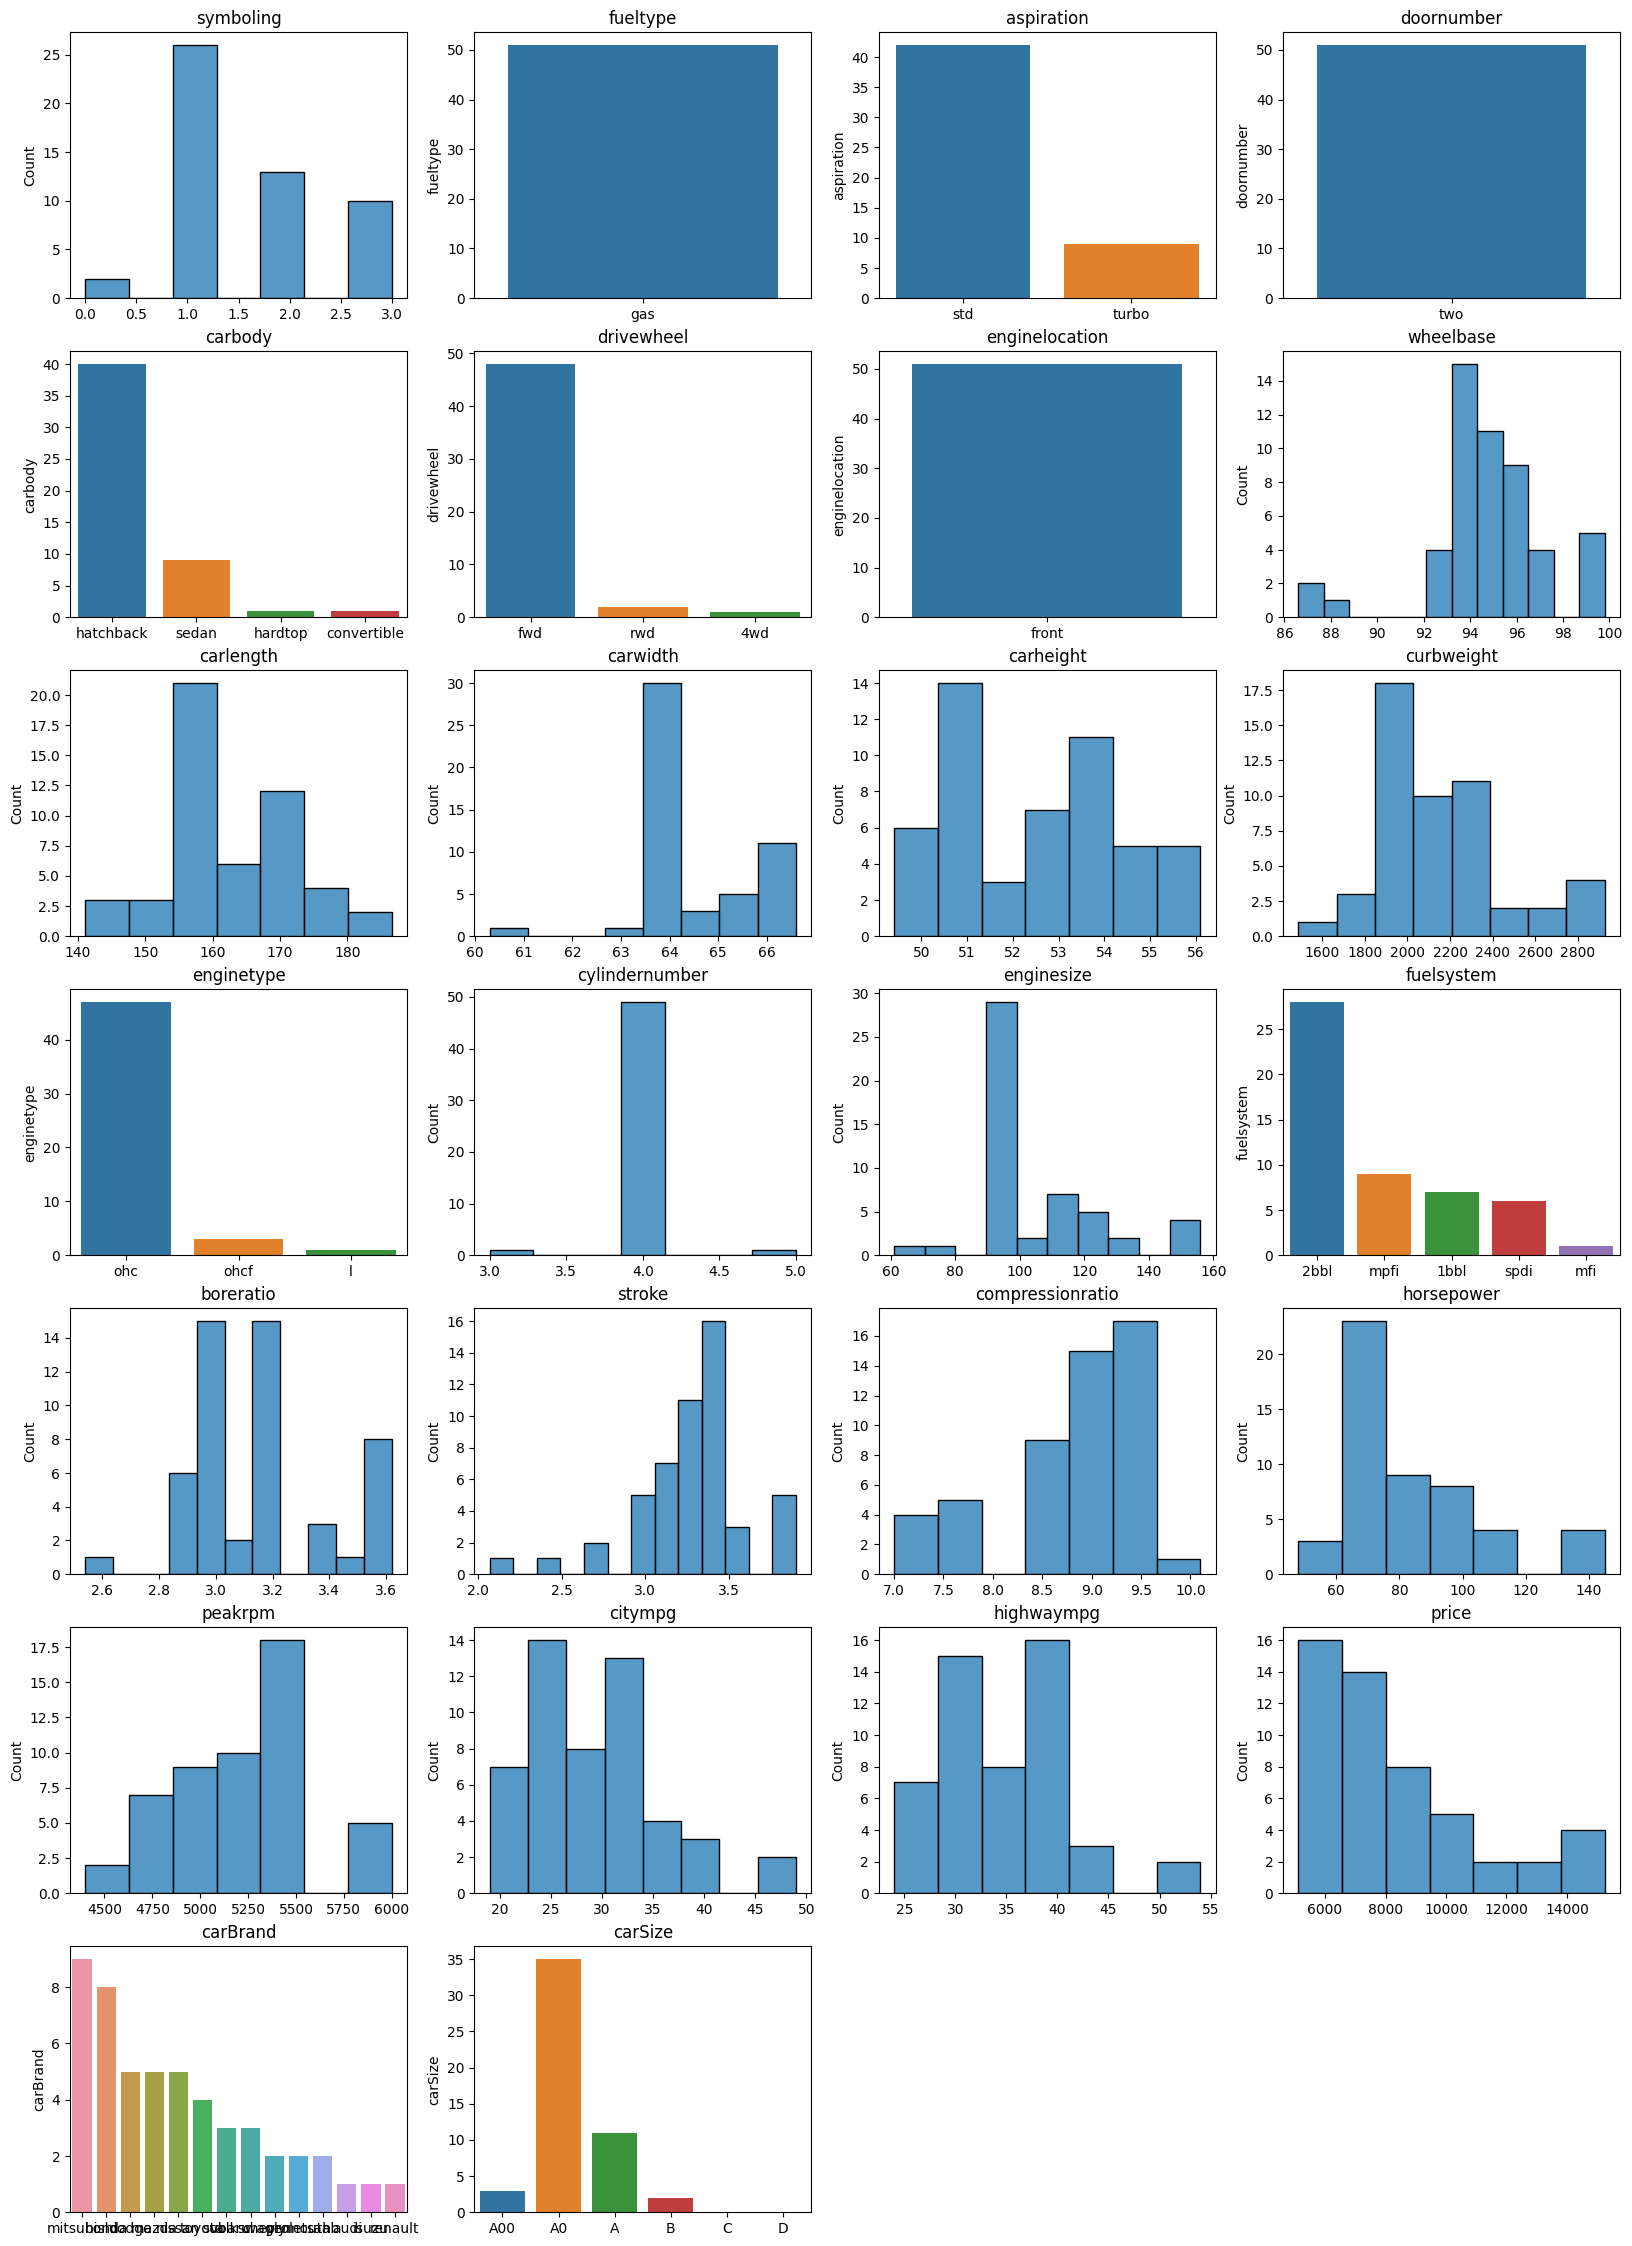

In [109]:
df0_1=df0.drop(['car_ID','CarName','km_result'],axis=1)

#查看集群4的车型所有特征分布
fig=plt.figure(figsize=(20,20))
i=1
for c in df0_1.columns:
    ax=fig.add_subplot(7,4,i)
    if df0_1[c].dtypes=='int' or df0_1[c].dtypes=='float':
        sns.histplot(df0_1[c],ax=ax)
    else:
        sns.barplot(x=df0_1[c].value_counts().index,y=df0_1[c].value_counts(),ax=ax)
    i=i+1
    plt.xlabel('')
    plt.title(c)  
plt.subplots_adjust(top=1.2)


plt.show()